# Potato Disease Classification

Dataset credits: https://www.kaggle.com/arjuntejaswi/plant-village

### Import all the Dependencies

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

2024-10-18 21:17:52.429538: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-18 21:17:52.437810: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-18 21:17:52.575080: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-18 21:17:55.011837: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Import data into tensorflow dataset object

Used splitfolders tool to split dataset into training, validation and test directories.

$ pip install split-folders

$ splitfolders --ratio 0.8 0.1 0.1 -- ./training/PlantVillage/


In [2]:
IMAGE_SIZE = 256
CHANNELS = 3

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
)

Found 1506 images belonging to 3 classes.


In [4]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [5]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
count=0
for image_batch, label_batch in train_generator:
    print(image_batch[0])
    break

[[[0.5542844  0.53467655 0.55820596]
  [0.70592254 0.6863147  0.7098441 ]
  [0.6432195  0.6236116  0.64714104]
  ...
  [0.670714   0.6511062  0.6746356 ]
  [0.67680204 0.6571942  0.6807236 ]
  [0.68289006 0.6632822  0.6868116 ]]

 [[0.5637547  0.54414684 0.56767625]
  [0.67548245 0.6558746  0.679404  ]
  [0.65945417 0.6398463  0.66337574]
  ...
  [0.6606685  0.64106065 0.66459006]
  [0.6525511  0.6329433  0.6564727 ]
  [0.64443374 0.6248259  0.6483553 ]]

 [[0.5732249  0.55361706 0.5771465 ]
  [0.64504236 0.6254345  0.6489639 ]
  [0.67568886 0.656081   0.67961043]
  ...
  [0.6267654  0.6071575  0.63068694]
  [0.6227067  0.60309887 0.6266283 ]
  [0.618648   0.59904015 0.62256956]]

 ...

 [[0.5299054  0.4828466  0.49068972]
  [0.5305819  0.48352304 0.49136618]
  [0.5312583  0.4841995  0.49204263]
  ...
  [0.5508661  0.5273367  0.53517985]
  [0.5511535  0.5276241  0.5354672 ]
  [0.5576644  0.534135   0.5419781 ]]

 [[0.5394211  0.49236226 0.5002054 ]
  [0.54889137 0.50183254 0.5096757 ]


In [7]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [8]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 431 images belonging to 3 classes.


In [9]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.60106844 0.58930373 0.6559704 ]
  [0.60056907 0.58880436 0.6554711 ]
  [0.6000698  0.5883051  0.6549718 ]
  ...
  [0.3392641  0.3274994  0.39416605]
  [0.3314848  0.3197201  0.38638675]
  [0.33226493 0.32050022 0.38716692]]

 [[0.6070311  0.5952664  0.66193306]
  [0.6055331  0.5937684  0.6604351 ]
  [0.60403514 0.59227043 0.6589371 ]
  ...
  [0.33826542 0.3265007  0.39316738]
  [0.33048612 0.3187214  0.38538808]
  [0.33276427 0.32099956 0.38766623]]

 [[0.6187001  0.6069354  0.67360204]
  [0.6172021  0.6054374  0.67210406]
  [0.615704   0.6039393  0.67060596]
  ...
  [0.33726674 0.32550204 0.3921687 ]
  [0.32948744 0.31772274 0.3843894 ]
  [0.3332636  0.3214989  0.38816556]]

 ...

 [[0.584244   0.5724793  0.639146  ]
  [0.5803922  0.5686275  0.63529414]
  [0.58040404 0.56863934 0.635306  ]
  ...
  [0.3999527  0.38426644 0.44309   ]
  [0.39595804 0.38027176 0.4390953 ]
  [0.39196336 0.3762771  0.43510062]]

 [[0.5837447  0.57198    0.63864666]
  [0.5803922  0.5686275  0.63529414]


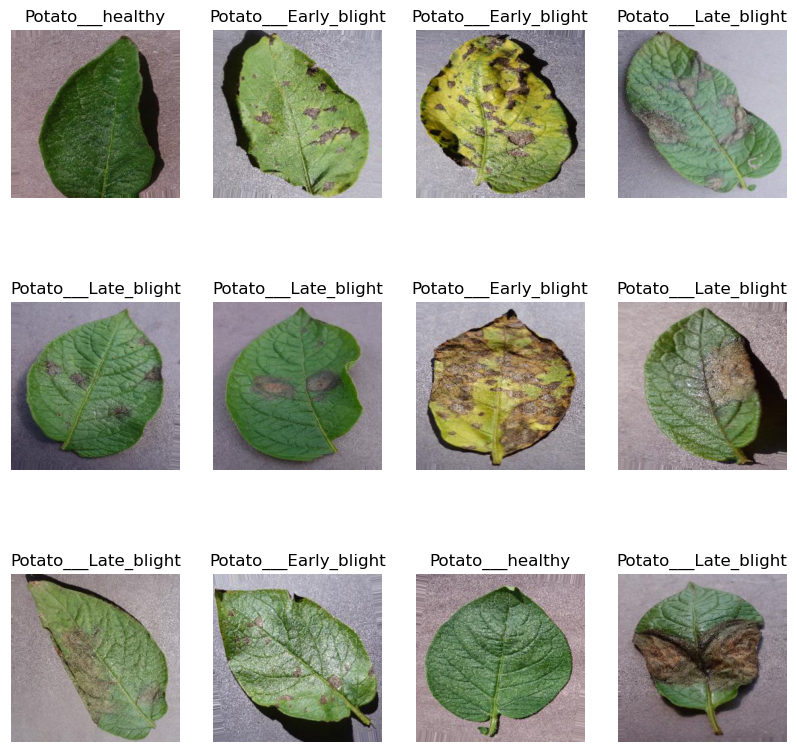

In [10]:
# Get a batch of images and labels from the train generator
image_batch, labels_batch = next(train_generator)

# Display the first 12 images from the batch
plt.figure(figsize=(10, 10))
for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(image_batch[i])
    plt.title(class_names[int(labels_batch[i])])
    plt.axis("off")
plt.show()


## Building the Model

In [11]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

/home/kedist/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

### Compiling the Model
We use `adam` Optimizer, `SparseCategoricalCrossentropy` for losses, `accuracy` as a metric

In [13]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [14]:
1506/32

47.0625

In [15]:
215/32

6.71875

In [16]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=30,
)

Epoch 1/30


/home/kedist/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-10-18 21:18:37.075448: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 264257536 exceeds 10% of free system memory.
2024-10-18 21:18:42.732554: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 264257536 exceeds 10% of free system memory.



 1/47 ━━━━━━━━━━━━━━━━━━━━ 15:07 20s/step - accuracy: 0.1875 - loss: 1.1004

2024-10-18 21:18:44.042637: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 264257536 exceeds 10% of free system memory.
2024-10-18 21:18:48.907519: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 264257536 exceeds 10% of free system memory.



 2/47 ━━━━━━━━━━━━━━━━━━━━ 4:38 6s/step - accuracy: 0.3047 - loss: 1.0856  

2024-10-18 21:18:50.228638: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 264257536 exceeds 10% of free system memory.


47/47 ━━━━━━━━━━━━━━━━━━━━ 372s 8s/step - accuracy: 0.4777 - loss: 0.9508 - val_accuracy: 0.6302 - val_loss: 0.8163
Epoch 2/30
 1/47 ━━━━━━━━━━━━━━━━━━━━ 4:56 6s/step - accuracy: 0.5938 - loss: 0.7289

2024-10-18 21:24:42.724131: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/home/kedist/anaconda3/lib/python3.11/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.5938 - loss: 0.7289 - val_accuracy: 0.5217 - val_loss: 0.8095
Epoch 3/30


2024-10-18 21:24:44.062565: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


47/47 ━━━━━━━━━━━━━━━━━━━━ 367s 7s/step - accuracy: 0.6470 - loss: 0.7391 - val_accuracy: 0.7083 - val_loss: 0.6395
Epoch 4/30
 1/47 ━━━━━━━━━━━━━━━━━━━━ 5:40 7s/step - accuracy: 0.7500 - loss: 0.5799

2024-10-18 21:30:58.529219: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.7500 - loss: 0.5799 - val_accuracy: 0.7826 - val_loss: 0.5057
Epoch 5/30


2024-10-18 21:30:59.894184: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


47/47 ━━━━━━━━━━━━━━━━━━━━ 371s 7s/step - accuracy: 0.7569 - loss: 0.5554 - val_accuracy: 0.7604 - val_loss: 0.5440
Epoch 6/30
 1/47 ━━━━━━━━━━━━━━━━━━━━ 4:59 7s/step - accuracy: 0.8750 - loss: 0.2884

2024-10-18 21:37:17.901977: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-18 21:37:19.329970: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


47/47 ━━━━━━━━━━━━━━━━━━━━ 26s 414ms/step - accuracy: 0.8750 - loss: 0.2884 - val_accuracy: 0.7826 - val_loss: 0.4193
Epoch 7/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 1320s 28s/step - accuracy: 0.8046 - loss: 0.4140 - val_accuracy: 0.8073 - val_loss: 0.4737
Epoch 8/30
 1/47 ━━━━━━━━━━━━━━━━━━━━ 4:24 6s/step - accuracy: 0.7812 - loss: 0.4228

2024-10-18 21:59:42.645734: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - accuracy: 0.7812 - loss: 0.4228 - val_accuracy: 0.6087 - val_loss: 0.6787
Epoch 9/30


2024-10-18 21:59:43.844726: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


47/47 ━━━━━━━━━━━━━━━━━━━━ 353s 7s/step - accuracy: 0.8450 - loss: 0.3834 - val_accuracy: 0.9167 - val_loss: 0.2601
Epoch 10/30
 1/47 ━━━━━━━━━━━━━━━━━━━━ 5:30 7s/step - accuracy: 0.9062 - loss: 0.1948

2024-10-18 22:05:44.098140: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9062 - loss: 0.1948 - val_accuracy: 0.9130 - val_loss: 0.2324
Epoch 11/30


2024-10-18 22:05:45.420663: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


47/47 ━━━━━━━━━━━━━━━━━━━━ 381s 8s/step - accuracy: 0.8831 - loss: 0.2745 - val_accuracy: 0.9115 - val_loss: 0.2519
Epoch 12/30
 1/47 ━━━━━━━━━━━━━━━━━━━━ 5:08 7s/step - accuracy: 0.9375 - loss: 0.1931

2024-10-18 22:12:13.068457: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.9375 - loss: 0.1931 - val_accuracy: 0.9565 - val_loss: 0.2765
Epoch 13/30


2024-10-18 22:12:14.451320: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


47/47 ━━━━━━━━━━━━━━━━━━━━ 372s 8s/step - accuracy: 0.9357 - loss: 0.1906 - val_accuracy: 0.9323 - val_loss: 0.1671
Epoch 14/30
 1/47 ━━━━━━━━━━━━━━━━━━━━ 5:34 7s/step - accuracy: 0.9688 - loss: 0.1367

2024-10-18 22:18:33.916878: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9688 - loss: 0.1367 - val_accuracy: 1.0000 - val_loss: 0.0421
Epoch 15/30


2024-10-18 22:18:35.286274: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


47/47 ━━━━━━━━━━━━━━━━━━━━ 373s 8s/step - accuracy: 0.9635 - loss: 0.1052 - val_accuracy: 0.9323 - val_loss: 0.1940
Epoch 16/30
 1/47 ━━━━━━━━━━━━━━━━━━━━ 5:34 7s/step - accuracy: 0.9688 - loss: 0.0645

2024-10-18 22:24:55.251413: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9688 - loss: 0.0645 - val_accuracy: 0.8261 - val_loss: 0.4624
Epoch 17/30


2024-10-18 22:24:56.550959: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


47/47 ━━━━━━━━━━━━━━━━━━━━ 373s 8s/step - accuracy: 0.9612 - loss: 0.0995 - val_accuracy: 0.9844 - val_loss: 0.0474
Epoch 18/30
 1/47 ━━━━━━━━━━━━━━━━━━━━ 7:15 9s/step - accuracy: 1.0000 - loss: 0.0308

2024-10-18 22:31:19.274518: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-18 22:31:21.106700: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


47/47 ━━━━━━━━━━━━━━━━━━━━ 25s 346ms/step - accuracy: 1.0000 - loss: 0.0308 - val_accuracy: 0.9565 - val_loss: 0.1067
Epoch 19/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 362s 8s/step - accuracy: 0.9752 - loss: 0.0712 - val_accuracy: 0.9271 - val_loss: 0.2464
Epoch 20/30
 1/47 ━━━━━━━━━━━━━━━━━━━━ 5:34 7s/step - accuracy: 0.8438 - loss: 0.3388

2024-10-18 22:37:44.451926: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.8438 - loss: 0.3388 - val_accuracy: 1.0000 - val_loss: 0.0653
Epoch 21/30


2024-10-18 22:37:45.812355: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


47/47 ━━━━━━━━━━━━━━━━━━━━ 376s 8s/step - accuracy: 0.9567 - loss: 0.0990 - val_accuracy: 0.8698 - val_loss: 0.3446
Epoch 22/30
 1/47 ━━━━━━━━━━━━━━━━━━━━ 6:10 8s/step - accuracy: 0.8438 - loss: 0.2250

2024-10-18 22:44:09.906150: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-18 22:44:11.307445: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


47/47 ━━━━━━━━━━━━━━━━━━━━ 26s 386ms/step - accuracy: 0.8438 - loss: 0.2250 - val_accuracy: 0.9565 - val_loss: 0.1143
Epoch 23/30
47/47 ━━━━━━━━━━━━━━━━━━━━ 357s 7s/step - accuracy: 0.9757 - loss: 0.0690 - val_accuracy: 0.9844 - val_loss: 0.0275
Epoch 24/30
 1/47 ━━━━━━━━━━━━━━━━━━━━ 5:36 7s/step - accuracy: 0.9062 - loss: 0.1925

2024-10-18 22:50:31.858113: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9062 - loss: 0.1925 - val_accuracy: 0.9565 - val_loss: 0.0437
Epoch 25/30


2024-10-18 22:50:33.170358: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


47/47 ━━━━━━━━━━━━━━━━━━━━ 382s 8s/step - accuracy: 0.9591 - loss: 0.1161 - val_accuracy: 0.9688 - val_loss: 0.0993
Epoch 26/30
 1/47 ━━━━━━━━━━━━━━━━━━━━ 4:58 6s/step - accuracy: 1.0000 - loss: 0.0341

2024-10-18 22:57:01.785073: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


47/47 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 1.0000 - loss: 0.0341 - val_accuracy: 1.0000 - val_loss: 0.1084
Epoch 27/30


2024-10-18 22:57:03.157466: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


47/47 ━━━━━━━━━━━━━━━━━━━━ 385s 8s/step - accuracy: 0.9736 - loss: 0.0797 - val_accuracy: 0.9896 - val_loss: 0.0259
Epoch 28/30
 1/47 ━━━━━━━━━━━━━━━━━━━━ 22s 494ms/step - accuracy: 1.0000 - loss: 0.0033

2024-10-18 23:03:28.194571: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 0.9130 - val_loss: 0.1515
Epoch 29/30


2024-10-18 23:03:29.825216: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


47/47 ━━━━━━━━━━━━━━━━━━━━ 367s 8s/step - accuracy: 0.9871 - loss: 0.0278 - val_accuracy: 0.9688 - val_loss: 0.0798
Epoch 30/30
 1/47 ━━━━━━━━━━━━━━━━━━━━ 5:43 7s/step - accuracy: 0.9375 - loss: 0.1045

2024-10-18 23:09:44.024470: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9375 - loss: 0.1045 - val_accuracy: 0.9565 - val_loss: 0.0615


2024-10-18 23:09:45.346373: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


In [17]:
scores = model.evaluate(test_generator)

14/14 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - accuracy: 0.9452 - loss: 0.1531


In [18]:
scores

[0.14504742622375488, 0.9489558935165405]

Scores is just a list containing loss and accuracy value

### Plotting the Accuracy and Loss Curves

In [19]:
history

You can read documentation on history object here: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History

In [20]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 47}

In [21]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

**loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch**

In [22]:
type(history.history['loss'])

list

In [23]:
len(history.history['loss'])

30

In [24]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.900223970413208,
 0.7289301156997681,
 0.7164948582649231,
 0.5799410343170166,
 0.5302947759628296]

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [26]:
val_acc

[0.6302083134651184,
 0.52173912525177,
 0.7083333134651184,
 0.782608687877655,
 0.7604166865348816,
 0.782608687877655,
 0.8072916865348816,
 0.6086956262588501,
 0.9166666865348816,
 0.9130434989929199,
 0.9114583134651184,
 0.95652174949646,
 0.9322916865348816,
 1.0,
 0.9322916865348816,
 0.8260869383811951,
 0.984375,
 0.95652174949646,
 0.9270833134651184,
 1.0,
 0.8697916865348816,
 0.95652174949646,
 0.984375,
 0.95652174949646,
 0.96875,
 1.0,
 0.9895833134651184,
 0.9130434989929199,
 0.96875,
 0.95652174949646]

In [27]:
acc

[0.5061058402061462,
 0.59375,
 0.6492537260055542,
 0.75,
 0.7645861506462097,
 0.875,
 0.8141112327575684,
 0.78125,
 0.8799185752868652,
 0.90625,
 0.871099054813385,
 0.9375,
 0.9423337578773499,
 0.96875,
 0.9633650183677673,
 0.96875,
 0.9708276987075806,
 1.0,
 0.9694707989692688,
 0.84375,
 0.9559022784233093,
 0.84375,
 0.9769335389137268,
 0.90625,
 0.9409769177436829,
 1.0,
 0.9813829660415649,
 1.0,
 0.9823608994483948,
 0.9375]

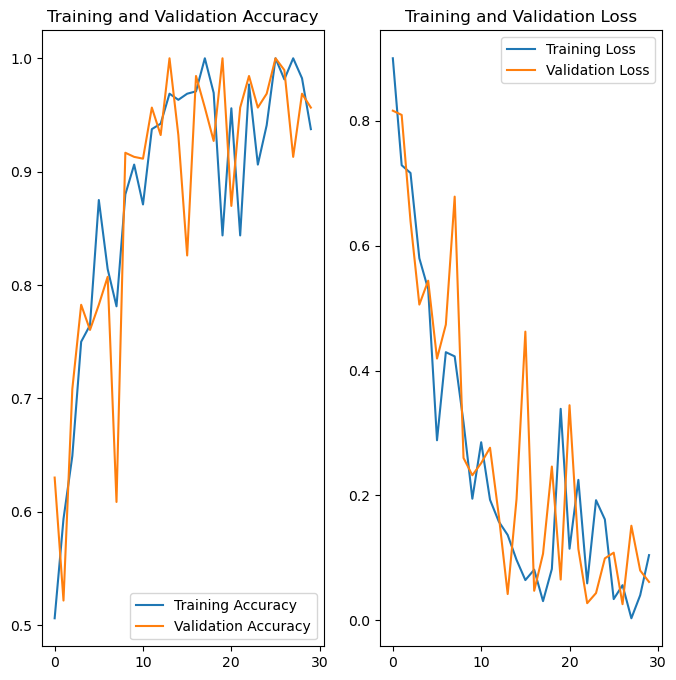

In [29]:
EPOCHS = 30

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Run prediction on a sample image

First image to predict
Actual label: Potato___healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted label: Potato___healthy


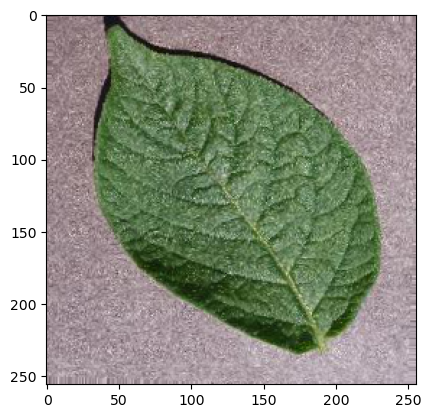

In [31]:
import numpy as np
for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])  
    
    print("First image to predict")
    plt.imshow(first_image)
    print("Actual label:", class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("Predicted label:", class_names[np.argmax(batch_prediction[0])])
    
    break

### Write a function for inference

In [32]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

**Now run inference on few sample images**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


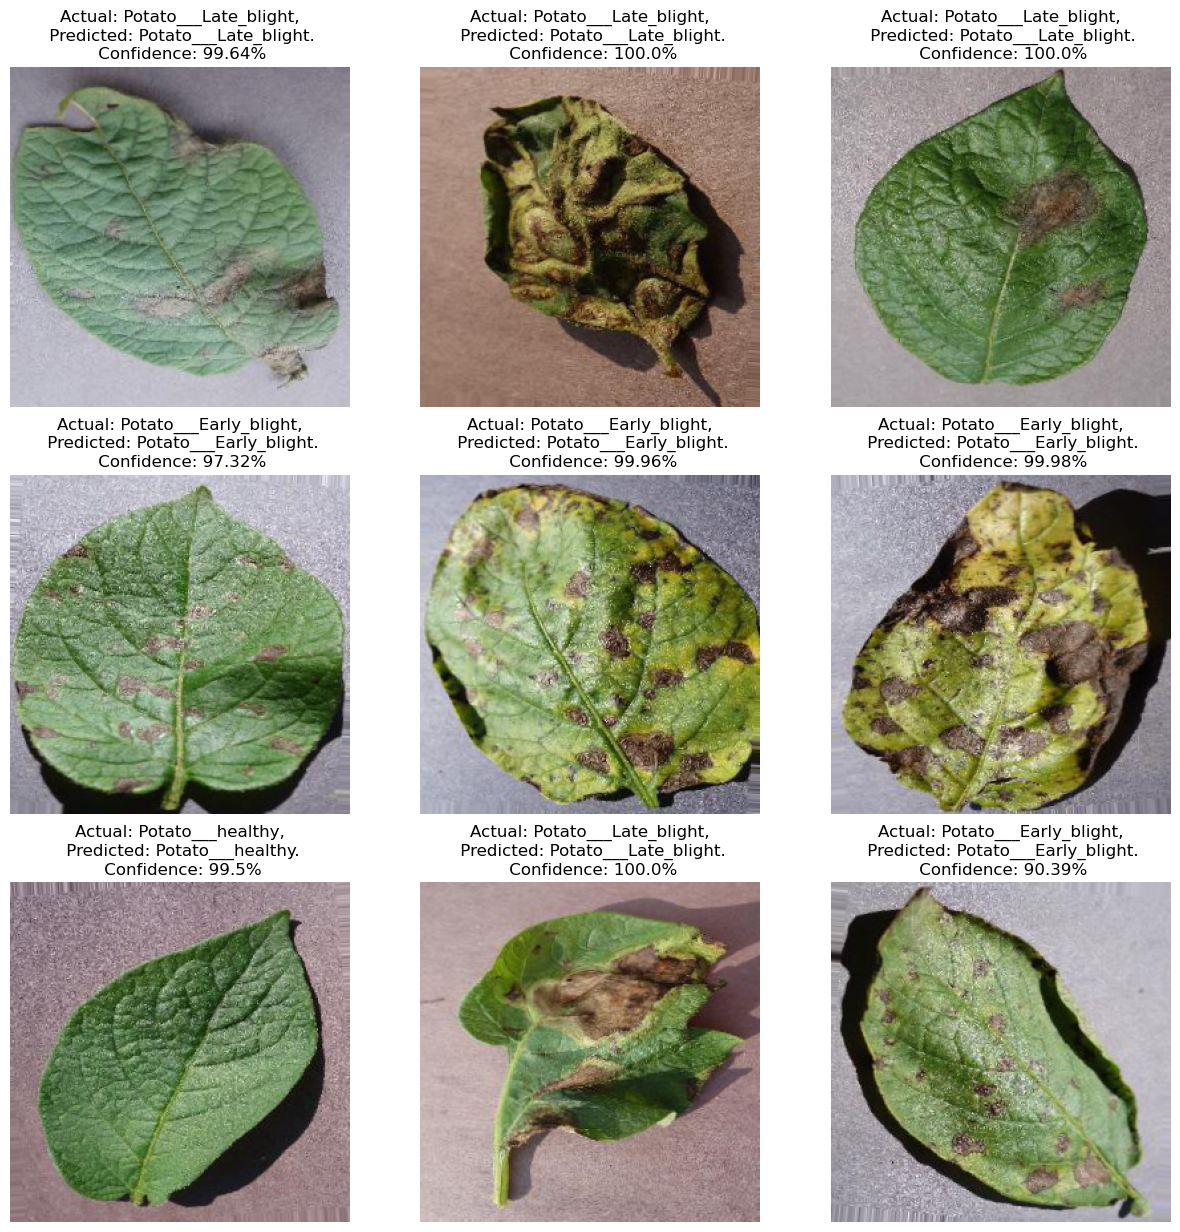

In [33]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

### Saving the Model

Save model in h5 format so that there is just one file and we can upload that to GCP conveniently

In [35]:
model.save("../saved-models/model.keras")